In [1]:
# importing the libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [2]:
train=pd.read_csv("D:\\Study\\Python\\scripts\\Deep_Learning\\Fake_News_Classifier\\train.csv")

In [3]:
train.shape

(20800, 5)

In [4]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
train=train.dropna()

In [7]:
train.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [8]:
train.shape

(18285, 5)

In [9]:
train.head(10)          # dropped index values are skipping now:

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [10]:
# lets reset the index:
train.reset_index(inplace=True)

In [11]:
train.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [12]:
# lets check the duplicate values:
train.duplicated().sum()

0

In [13]:
df=train.drop(['label'], axis=1)
df.head()

,index,id,title,author,text
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [14]:
Y=train['label']
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [15]:
porter=PorterStemmer()
corpus=[]
for i in range(0,len(df['title'])):
    review=re.sub('^[a-zA-Z]', ' ', df['title'][i])
    review=review.lower()
    review=review.split()
    review=[porter.stem(word) for word in review if word not in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus.append(review)

In [16]:
corpus[1]

'lynn: hillari clinton, big woman campu - breitbart'

In [17]:
# lets create one_hot encoding:
from tensorflow.keras.preprocessing.text import one_hot
voc_size=5000

In [18]:
one_hot=[one_hot(word, voc_size) for word in corpus]   #converted every word of sentence into index number of vector of 5K
one_hot

[[699, 211, 2332, 4730, 752, 4057, 4081, 1135, 1329, 892, 129],
 [1318, 4760, 778, 672, 775, 4153, 2947],
 [2892, 4666, 4448, 113, 4973],
 [2274, 2567, 4082, 4806, 3862, 1125, 4260],
 [3425, 775, 974, 3768, 1129, 3536, 775, 2854, 724, 2690],
 [2621,
  1748,
  868,
  2376,
  3575,
  1743,
  3554,
  1565,
  1081,
  4529,
  4836,
  4035,
  4034,
  1307,
  2947],
 [4285, 3224, 1457, 4529, 3959, 2299, 2389, 1886, 443, 1386, 269],
 [4245, 3303, 882, 1983, 1381, 4568, 1743, 2107, 443, 1386, 269],
 [152, 3332, 4452, 1941, 1731, 1113, 38, 1132, 4087, 4352],
 [1940, 2756, 3092, 3853, 4765, 1121, 3430, 3298],
 [754, 3903, 4959, 1186, 28, 3295, 3839, 3907, 1444, 4964, 2089],
 [1932, 4057, 1113, 1743, 1381],
 [4656, 4781, 3816, 4650, 4174, 1694, 1720, 2437, 1784, 2528],
 [4837, 2436, 1245, 667, 4086, 1437, 586, 689, 443, 1386, 269],
 [3966, 4426, 4831, 2268, 1806, 443, 1386, 269],
 [2564, 1606, 1818, 2460, 2844, 4609, 940, 1679, 3264, 7, 85, 3098],
 [1896, 4811, 2785],
 [3306, 1689, 4953, 1140, 174

In [19]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padding=pad_sequences(one_hot, maxlen=20, padding='pre')
padding

array([[   0,    0,    0, ..., 1329,  892,  129],
       [   0,    0,    0, ...,  775, 4153, 2947],
       [   0,    0,    0, ..., 4448,  113, 4973],
       ...,
       [   0,    0,    0, ...,  443, 1386,  269],
       [   0,    0,    0, ..., 1131, 4971, 1671],
       [   0,    0,    0, ..., 3042,  535, 2466]])

In [23]:
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.models import Sequential

In [21]:
model=Sequential()                                                # initialezed model
model.add(Embedding(voc_size, output_dim=40, input_length=20))     # adding embadding layer, input_length=maxlen of vector
model.add(LSTM(100))                                              # adding LSTM with 100 Neurons
model.add(Dense(1, activation='sigmoid'))        # output layer as binary classfication problem, o/p in probability
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])   # model compilation

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            200000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________


In [24]:
model_1=Sequential()                                             
model_1.add(Embedding(voc_size, output_dim=40, input_length=20))
model_1.add(Dropout(0.3))
model_1.add(Bidirectional(LSTM(100)))
model_1.add(Dropout(0.3))
model_1.add(Dense(1, activation='sigmoid'))     
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
len(padding), type(padding), Y.shape, type(Y)

(18285, numpy.ndarray, (18285,), pandas.core.series.Series)

In [26]:
X=pd.DataFrame(padding)

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=0)

In [28]:
model_history=model_1.fit(X_train,Y_train, validation_data=(X_test,Y_test),  batch_size=64, epochs=10)
model_history

Epoch 1/10
229/229 [==============================] - 16s 50ms/step - loss: 0.4139 - accuracy: 0.7750 - val_loss: 0.1983 - val_accuracy: 0.9166
Epoch 2/10
229/229 [==============================] - 10s 45ms/step - loss: 0.1233 - accuracy: 0.9537 - val_loss: 0.2044 - val_accuracy: 0.9191
Epoch 3/10
229/229 [==============================] - 10s 44ms/step - loss: 0.0813 - accuracy: 0.9721 - val_loss: 0.2425 - val_accuracy: 0.9139
Epoch 4/10
229/229 [==============================] - 10s 44ms/step - loss: 0.0574 - accuracy: 0.9821 - val_loss: 0.2834 - val_accuracy: 0.9125
Epoch 5/10
229/229 [==============================] - 11s 46ms/step - loss: 0.0415 - accuracy: 0.9874 - val_loss: 0.3728 - val_accuracy: 0.9125
Epoch 6/10
229/229 [==============================] - 10s 44ms/step - loss: 0.0244 - accuracy: 0.9932 - val_loss: 0.4370 - val_accuracy: 0.9062
Epoch 7/10
229/229 [==============================] - 10s 45ms/step - loss: 0.0205 - accuracy: 0.9941 - val_loss: 0.4839 - val_accuracy:

In [29]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

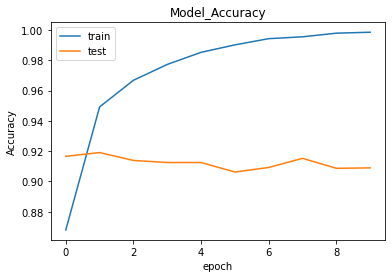

In [30]:
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.title("Model_Accuracy")
plt.legend(['train','test'])

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
model_pred=model_1.predict_classes(X_test)
confusion_matrix(model_pred, Y_test)

C:\Users\Dell\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1848,  141],
       [ 192, 1476]], dtype=int64)

In [34]:
accuracy_score(model_pred, Y_test)

0.9089417555373257